In [ ]:
from datetime import datetime
import pandas as pd
import io
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import numpy as np
import pickle
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

**ETAPA 1**

**Importando arquivo teste e alterando os nomes das colunas**

In [ ]:
df_teste = pd.read_csv (r'teste.csv')
df_teste.rename(columns={'temratura-50m': 'temperatura-50m'}, inplace = True)
df_teste.rename(columns={'velocidde-vento-25m': 'velocidade-vento-25m'}, inplace = True)
# imprimindo os 5 primeiros elementos
df_teste.head()

,ano,dia,data-hora,minuto,velocidade-vento-25m,direcao-vento-25m,temperatura-25m,velocidade-vento-50m,direcao-vento-50m,temperatura-50m
0,2010,278,2010-10-5 08:00:00,480,3.257333,139.116667,21.621667,4.960833,133.550000,21.283333
1,2010,278,2010-10-5 09:00:00,540,2.786167,143.883333,22.186667,3.783000,138.800000,21.550000
2,2010,278,2010-10-5 10:00:00,600,5.204167,144.983333,23.358333,6.489667,140.066667,22.695000
3,2010,278,2010-10-5 11:00:00,660,5.404333,133.116667,25.068333,6.390000,128.200000,24.313333
4,2010,278,2010-10-5 12:00:00,720,5.333167,139.266667,26.551667,6.098167,134.283333,25.748333


**Calculando o número de elementos da tabela do arquivo de teste**

In [ ]:
aux = df_teste.shape
elementos = aux[0]*aux[1]
elementos

10000

**Calculando a média dos valores da coluna velocidade-vento-50m da tabela do arquivo de teste**

In [ ]:
vel_teste = df_teste['velocidade-vento-50m']
vel_med_teste = vel_teste.describe()[1]
vel_med_teste

5.022554333333336

**Importando aquivo treino e alterando os nomes das colunas**

In [ ]:
df_treino = pd.read_csv (r'treino.csv')
df_treino.rename(columns={'temratura-50m': 'temperatura-50m'}, inplace = True)
df_treino.rename(columns={'velocidde-vento-25m': 'velocidade-vento-25m'}, inplace = True)
# imprimindo os 5 primeiros elementos
df_treino.head()

,ano,dia,data-hora,minuto,velocidade-vento-25m,direcao-vento-25m,temperatura-25m,velocidade-vento-50m,direcao-vento-50m,temperatura-50m
0,2010,1,2010-1-1 00:00:00,0,0.881500,298.333333,24.868333,0.932500,318.233333,24.888333
1,2010,1,2010-1-1 01:00:00,60,1.366167,329.533333,24.826667,1.825333,321.100000,24.858333
2,2010,1,2010-1-1 02:00:00,120,1.118667,290.233333,24.648333,2.170333,276.033333,25.133333
3,2010,1,2010-1-1 03:00:00,180,0.618000,196.950000,23.916667,1.472500,218.800000,24.268333
4,2010,1,2010-1-1 04:00:00,240,1.517833,117.183333,23.740000,2.058333,130.333333,23.801667


**Calculando o número de elementos da tabela do arquivo de treino**

In [ ]:
aux = df_treino.shape
elementos = aux[0]*aux[1]
elementos


66560

**Calculando a média dos valores da coluna velocidade-vento-50m da tabela do arquivo de treino**

In [ ]:
vel_treino = df_treino['velocidade-vento-50m']
vel_med_treino = vel_treino.describe()[1]
vel_med_treino

5.016940604967936

**Exibindo qual Data apresentou o maior valor de velocidade-vento-50m**

In [ ]:
if vel_med_teste < vel_med_treino:
    print('O Data treino apresentou o maior valor de velocidade-vento-50m')
else:
    print('O Data teste apresentou o maior valor de velocidade-vento-50m')

O Data teste apresentou o maior valor de velocidade-vento-50m


**Análise gráfica dos dados de teste**


*   Dados à uma altura de 25m






Velocidade do vento

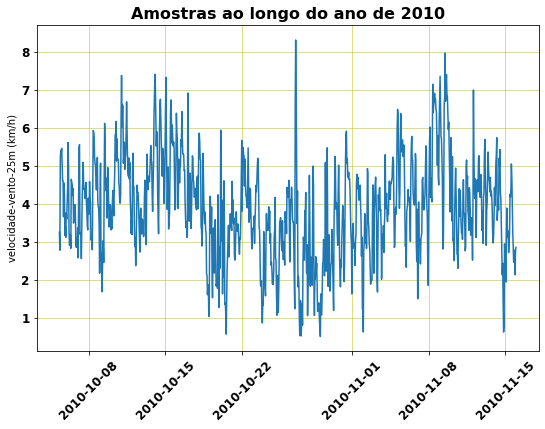

In [ ]:
# Vetor de tempo
temp = pd.to_datetime(df_teste['data-hora'])
# Criando figuras e eixos
fig, ax = plt.subplots(figsize = (9,6))
# Criando figuras para os dados de velocidade do arquivo teste à 25m de altitude
vel_25m = df_teste['velocidade-vento-25m']
plt.title('Amostras ao longo do ano de 2010', weight='bold', fontsize=16)
ax.plot(temp,vel_25m)
ax.set_ylabel('velocidade-vento-25m (km/h)')
plt.grid(color = 'y', linewidth = 0.5)
plt.xticks(weight='bold', fontsize=12, rotation=45)
plt.yticks(weight='bold', fontsize=12)
plt.show()

Temperatura

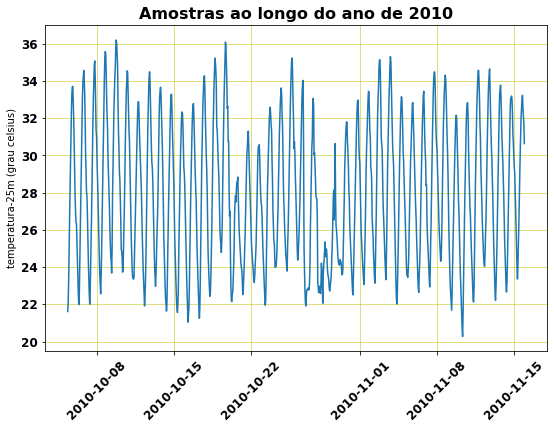

In [ ]:
# Criando figuras e eixos
fig, ax = plt.subplots(figsize = (9,6))
# Criando figuras para os dados de temperatura do arquivo teste à 25m de altitude
temp_25m = df_teste['temperatura-25m']
plt.title('Amostras ao longo do ano de 2010', weight='bold', fontsize=16)
ax.plot(temp,temp_25m)
ax.set_ylabel('temperatura-25m (grau celsius)')
plt.grid(color = 'y', linewidth = 0.5)
plt.xticks(weight='bold', fontsize=12, rotation=45)
plt.yticks(weight='bold', fontsize=12)
plt.show()

*   Dados à uma altura de 50m



Velocidade do vento

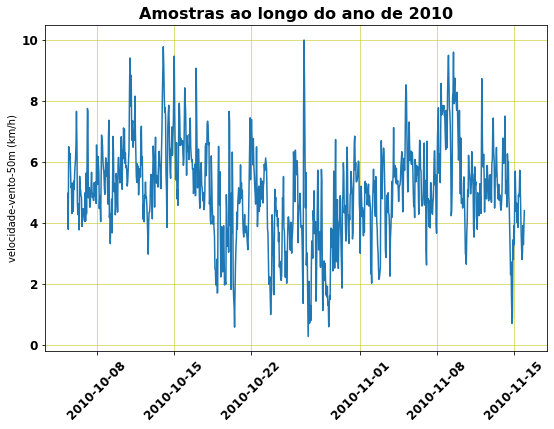

In [ ]:
# Criando figuras e eixos
fig, ax = plt.subplots(figsize = (9,6))
# Criando figuras para os dados de velocidade do arquivo teste à 25m de altitude
vel_50m = df_teste['velocidade-vento-50m']
plt.title('Amostras ao longo do ano de 2010', weight='bold', fontsize=16)
ax.plot(temp,vel_50m)
ax.set_ylabel('velocidade-vento-50m (km/h)')
plt.grid(color = 'y', linewidth = 0.5)
plt.xticks(weight='bold', fontsize=12, rotation=45)
plt.yticks(weight='bold', fontsize=12)
plt.show()

Temperatura

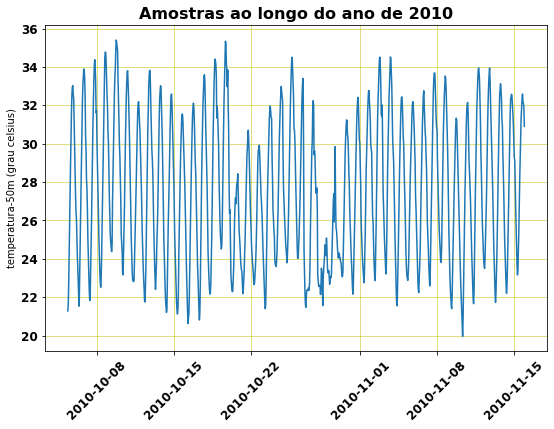

In [ ]:
# Criando figuras e eixos
fig, ax = plt.subplots(figsize = (9,6))
# Criando figuras para os dados de velocidade do arquivo teste à 25m de altitude
temp_50m = df_teste['temperatura-50m']
plt.title('Amostras ao longo do ano de 2010', weight='bold', fontsize=16)
ax.plot(temp,temp_50m)
ax.set_ylabel('temperatura-50m (grau celsius)')
plt.grid(color = 'y', linewidth = 0.5)
plt.xticks(weight='bold', fontsize=12, rotation=45)
plt.yticks(weight='bold', fontsize=12)
plt.show()

**Análise gráfica dos dados de treino**

*   Dados à uma altura de 25m



Velocidade do vento

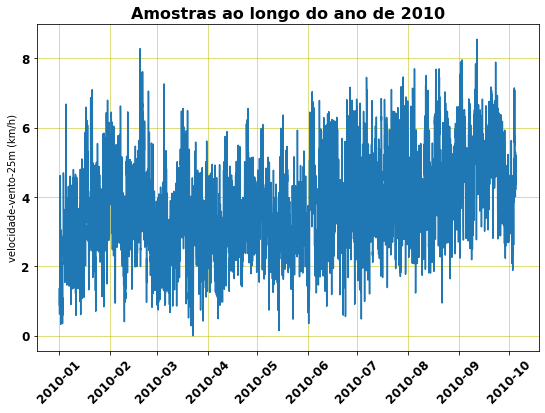

In [ ]:
# Vetor de tempo
temp = pd.to_datetime(df_treino['data-hora'])
# Criando figuras e eixos
fig, ax = plt.subplots(figsize = (9,6))
# Criando figuras para os dados de velocidade do arquivo teste à 25m de altitude
vel_25m = df_treino['velocidade-vento-25m']
plt.title('Amostras ao longo do ano de 2010', weight='bold', fontsize=16)
ax.plot(temp,vel_25m)
ax.set_ylabel('velocidade-vento-25m (km/h)')
plt.grid(color = 'y', linewidth = 0.5)
plt.xticks(weight='bold', fontsize=12, rotation=45)
plt.yticks(weight='bold', fontsize=12)
plt.show()

Temperatura

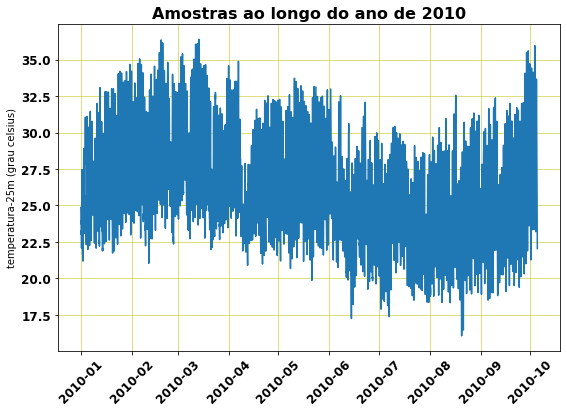

In [ ]:
# Criando figuras e eixos
fig, ax = plt.subplots(figsize = (9,6))
# Criando figuras para os dados de temperatura do arquivo teste à 25m de altitude
temp_25m = df_treino['temperatura-25m']
plt.title('Amostras ao longo do ano de 2010', weight='bold', fontsize=16)
ax.plot(temp,temp_25m)
ax.set_ylabel('temperatura-25m (grau celsius)')
plt.grid(color = 'y', linewidth = 0.5)
plt.xticks(weight='bold', fontsize=12, rotation=45)
plt.yticks(weight='bold', fontsize=12)
plt.show()

*   Dados à uma altura de 50m



Velocidade do vento

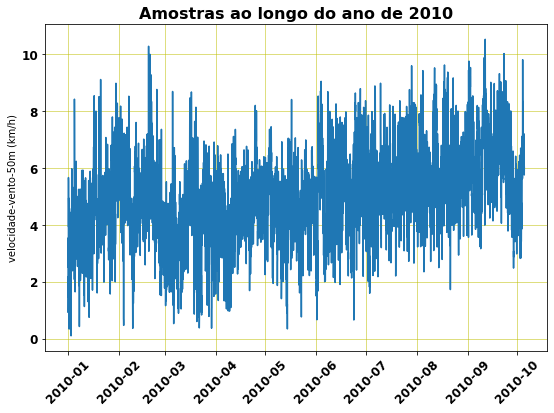

In [ ]:
# Vetor de tempo
temp = pd.to_datetime(df_treino['data-hora'])
# Criando figuras e eixos
fig, ax = plt.subplots(figsize = (9,6))
# Criando figuras para os dados de velocidade do arquivo teste à 25m de altitude
vel_25m = df_treino['velocidade-vento-50m']
plt.title('Amostras ao longo do ano de 2010', weight='bold', fontsize=16)
ax.plot(temp,vel_25m)
ax.set_ylabel('velocidade-vento-50m (km/h)')
plt.grid(color = 'y', linewidth = 0.5)
plt.xticks(weight='bold', fontsize=12, rotation=45)
plt.yticks(weight='bold', fontsize=12)
plt.show()

Temperatura

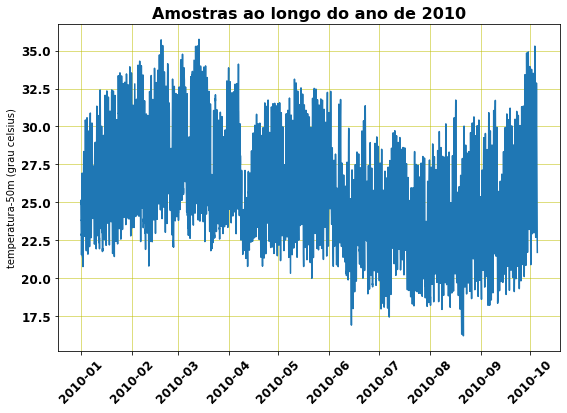

In [ ]:
# Criando figuras e eixos
fig, ax = plt.subplots(figsize = (9,6))
# Criando figuras para os dados de temperatura do arquivo teste à 25m de altitude
temp_25m = df_treino['temperatura-50m']
plt.title('Amostras ao longo do ano de 2010', weight='bold', fontsize=16)
ax.plot(temp,temp_25m)
ax.set_ylabel('temperatura-50m (grau celsius)')
plt.grid(color = 'y', linewidth = 0.5)
plt.xticks(weight='bold', fontsize=12, rotation=45)
plt.yticks(weight='bold', fontsize=12)
plt.show()

**Comentários e Discussões**

  Através dos dados de treino, é possível perceber certa similaridade entre os dados de temperatura e velocidade do vento, para as altitudes de 25m e 50m. Esse padrão de comportamente é mantido nos dados de teste.

**ETAPA 2**

**Tratando dados faltantes**

Arquivo de treino - Substituindo valores ausentes pela mediana da coluna

In [ ]:
# data1
mediana = df_treino['velocidade-vento-25m'].median()
df_treino.fillna(mediana,inplace=True)
# data2
mediana = df_treino['velocidade-vento-50m'].median()
df_treino.fillna(mediana,inplace=True)
# data3
mediana = df_treino['direcao-vento-25m'].median()
df_treino.fillna(mediana,inplace=True)
# data4
mediana = df_treino['direcao-vento-50m'].median()
df_treino.fillna(mediana,inplace=True)
# data5
mediana = df_treino['temperatura-25m'].median()
df_treino.fillna(mediana,inplace=True)
# data6
mediana = df_treino['temperatura-50m'].median()
df_treino.fillna(mediana,inplace=True)

Arquivo de teste - Substituindo valores ausentes pela mediana da coluna

In [ ]:
# data1
mediana = df_teste['velocidade-vento-25m'].median()
df_teste.fillna(mediana,inplace=True)
# data2
mediana = df_teste['velocidade-vento-50m'].median()
df_teste.fillna(mediana,inplace=True)
# data3
mediana = df_teste['direcao-vento-25m'].median()
df_teste.fillna(mediana,inplace=True)
# data4
mediana = df_teste['direcao-vento-50m'].median()
df_teste.fillna(mediana,inplace=True)
# data5
mediana = df_teste['temperatura-25m'].median()
df_teste.fillna(mediana,inplace=True)
# data6
mediana = df_teste['temperatura-50m'].median()
df_teste.fillna(mediana,inplace=True)

**Tratando variável temporal dos arquivos de teste e treino**

Convertendo a coluna "data-hora" para "horas" e tornando a variável temporal contínua

In [ ]:
# Convertendo o data do arquivo de teste
time_base = datetime.timestamp(datetime.strptime(df_teste['data-hora'][0],'%Y-%m-%d %H:%M:%S'))
hours_teste = []
for index in range(0,df_teste['data-hora'].size):
    time_converted = datetime.timestamp(datetime.strptime(df_teste['data-hora'][index],'%Y-%m-%d %H:%M:%S'))-time_base
    hours_teste.append(time_converted/3600)
# Substituindo os valores na tabela original
df_teste = df_teste.assign(**{'data-hora':hours_teste})

# Convertendo o data do arquivo de treino
time_base = datetime.timestamp(datetime.strptime(df_treino['data-hora'][0],'%Y-%m-%d %H:%M:%S'))
hours_treino = []
for index in range(0,df_treino['data-hora'].size):
    time_converted = datetime.timestamp(datetime.strptime(df_treino['data-hora'][index],'%Y-%m-%d %H:%M:%S'))-time_base
    hours_treino.append(time_converted/3600)
# Substituindo os valores na tabela original
df_treino = df_treino.assign(**{'data-hora':hours_treino})

**Dividindo e Escalonando os dados de treinamento**

Escalonando os dados antes da divisão (salvando o escalonador em arquivo .pkl)

In [ ]:
df_norm = (df_treino - pd.to_numeric(df_treino.min())) / (pd.to_numeric(df_treino.max()) - pd.to_numeric(df_treino.min()))
with open('escalonador.pkl', 'wb') as file:
    pickle.dump(df_norm, file)

Dividindo os dados de treinamento

In [ ]:
x_train = df_norm
y_train = []
for index in range(0,df_treino['data-hora'].size - 3):
    linha = []
    t = 1
    for i in range(3):
        linha.append(x_train['velocidade-vento-50m'][index+t])
        t = t+1
    y_train.append(linha)

Separando uma parte dos dados para validação

In [ ]:
# Removendo colunas que não serão utilizadas
x_train.drop(x_train.columns[[0,1,2,3]], axis=1, inplace=True)
# Fracionando - 15%
split_fraction = 0.15
x_train_split = int(split_fraction * int(x_train.shape[0]))
x_val = x_train[:x_train_split]
y_val = y_train[:x_train_split]

**Dividindo os dados de teste**

In [ ]:
# Escalonando os dados de teste antes da divisão
df_norm = (df_teste - pd.to_numeric(df_teste.min())) / (pd.to_numeric(df_teste.max()) - pd.to_numeric(df_teste.min()))
x_test = df_norm
y_test = []
for index in range(0,x_test['data-hora'].size - 3):
    linha = []
    t = 1
    for i in range(3):
        linha.append(x_test['velocidade-vento-50m'][index+t])
        t = t+1
    y_test.append(linha)

**ETAPA 3**

Desenvolvendo modelo de predição para velocidade-vento-50m das 3 próximas horas

In [ ]:
# reshape input [samples, timesteps, features]
x_train_ = pd.DataFrame(x_train).values.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_val_ = pd.DataFrame(x_val).values.reshape((x_val.shape[0], 1, x_val.shape[1]))
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(x_train_.shape[1], x_train_.shape[2])))
model.add(Dense(3))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(x_train_[:np.array(y_train).shape[0]], np.array(y_train), epochs=70, batch_size=82, validation_data=(x_val_, np.array(y_val)), verbose=2, shuffle=False)
# Salvando o modelo
model.save('model.h5')
# plot history
fig, ax = plt.subplots(figsize = (9,6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.grid(color = 'y', linewidth = 0.5)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Avaliando quantitativamente o desempenho final do modelo

In [ ]:
# Removendo colunas que não serão utilizadas
x_test.drop(x_test.columns[[0,1,2,3]], axis=1, inplace=True)
# reshape input [samples, timesteps, features]
x_test_ = pd.DataFrame(x_test).values.reshape((x_test.shape[0], 1, x_test.shape[1]))
yhat = model.predict(x_test_)

**Mean Squared Error (MSE)**

In [ ]:
mean_squared_error(np.array(y_test), yhat[:np.array(y_test).shape[0]])

0.014926452886662838

**Mean Absolute Error (MAE)**

In [ ]:
mean_absolute_error(np.array(y_test), yhat[:np.array(y_test).shape[0]])

0.09098130749545852

**Comentários e discussões**

Os baixos valores de MSE e MAE demostram que não houve erros significativos associados a valores previstos, ou seja, não houve valores muito baixos ou muito altos em relação ao que se esperava e nem valores fora do que se esperava de forma persistente.

**Análise gráfica**

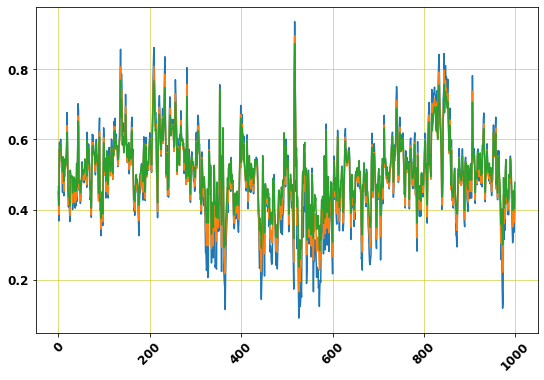

In [ ]:
# Criando figuras e eixos
fig, ax = plt.subplots(figsize = (9,6))
ax.plot(yhat)
plt.grid(color = 'y', linewidth = 0.5)
plt.xticks(weight='bold', fontsize=12, rotation=45)
plt.yticks(weight='bold', fontsize=12)
plt.title('Resposta do modelo', weight='bold', fontsize=16)
plt.show()

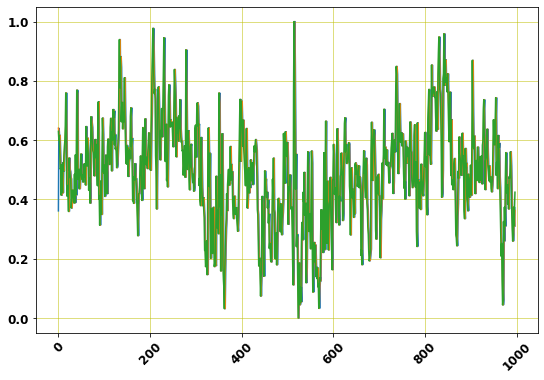

In [ ]:
# Criando figuras e eixos
fig, ax = plt.subplots(figsize = (9,6))
ax.plot(y_test)
plt.grid(color = 'y', linewidth = 0.5)
plt.xticks(weight='bold', fontsize=12, rotation=45)
plt.yticks(weight='bold', fontsize=12)
plt.title('Resposta do teste', weight='bold', fontsize=16)
plt.show()

**Comentários e discussões**

Através da análise gráfica é possível perceber certa similaridade entre os valores oriundos do modelo e do arquivo de teste.